In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay, accuracy_score
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
import joblib
import warnings
import pickle

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
warnings.filterwarnings("ignore")

# Load dataset
df = pd.read_csv("C:/Projects/Credit_scoring_system_project/data/processed/cleaned_credit_rick.csv")

In [2]:
df['loan_status'].value_counts()

loan_status
0    22435
1     6203
Name: count, dtype: int64

In [3]:
X = df.drop('loan_status', axis=1)
y = df['loan_status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

with open("preprocessing_pipeline.pkl", "rb") as f:
    preprocessing_pipeline = pickle.load(f)

In [4]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42),
    "XGBoost": XGBClassifier(eval_metric='logloss', use_label_encoder=False, random_state=42),
    "LightGBM": LGBMClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "CatBoost": CatBoostClassifier(verbose=0, random_state=42)
}

best_model = None
best_score = 0
best_model_name = None

for name, model in models.items():
    pipeline = ImbPipeline([
        ("preprocess", preprocessing_pipeline),
        ("smote", SMOTE(random_state=42)),  
        ("model", model)
    ])
    
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))
    
    if acc > best_score:
        best_score = acc
        best_model = pipeline
        best_model_name = name

print(f"\n✅ Eng yaxshi model: {best_model_name} (Accuracy: {best_score:.4f})")

# Eng yaxshi modelni saqlash
with open("C:/Projects/Credit_scoring_system_project/models/best_model.pkl", "wb") as f:
    pickle.dump(best_model, f)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['person_age',
                                                   'person_income',
                                                   'person_emp_length',
                                                   'loan_amnt', 'loan_int_rate',
                                                   'cb_person_cred_hist_length']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['person_home_ownership',
                                                   'loan_intent'])])),
                ('smote', SMOTE(random_state=42)),
                ('model', LogisticRegression(max_iter=1000))])

Logistic Regression Accuracy: 0.7509
              precision    recall  f1-score   support

           0       0.92      0.75      0.82      4487
           1       0.46      0.77      0.57      1241

    accuracy                           0.75      5728
   macro avg       0.69      0.76      0.70      5728
weighted avg       0.82      0.75      0.77      5728



Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['person_age',
                                                   'person_income',
                                                   'person_emp_length',
                                                   'loan_amnt', 'loan_int_rate',
                                                   'cb_person_cred_hist_length']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['person_home_ownership',
                                                   'loan_intent'])])),
                ('smote', SMOTE(random_state=42)),
                ('model',
                 RandomForestClassifier(n_estimators=200, random_state=42))])

Random Forest Accuracy: 0.9050
              precision    recall  f1-score   support

           0       0.93      0.96      0.94      4487
           1       0.82      0.72      0.77      1241

    accuracy                           0.91      5728
   macro avg       0.87      0.84      0.85      5728
weighted avg       0.90      0.91      0.90      5728



Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['person_age',
                                                   'person_income',
                                                   'person_emp_length',
                                                   'loan_amnt', 'loan_int_rate',
                                                   'cb_person_cred_hist_length']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['person_home_ownership',
                                                   'loan_intent'])])),
                ('smote', SMOTE(random_state=42)),
                ('model',
                 XGBClassifier(base_scor...
                               feature_types=None, feature_weights=None,
                               gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, ...))])

XGBoost Accuracy: 0.9211
              precision    recall  f1-score   support

           0       0.93      0.98      0.95      4487
           1       0.89      0.72      0.80      1241

    accuracy                           0.92      5728
   macro avg       0.91      0.85      0.87      5728
weighted avg       0.92      0.92      0.92      5728

[LightGBM] [Info] Number of positive: 17948, number of negative: 17948
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006465 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2041
[LightGBM] [Info] Number of data points in the train set: 35896, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['person_age',
                                                   'person_income',
                                                   'person_emp_length',
                                                   'loan_amnt', 'loan_int_rate',
                                                   'cb_person_cred_hist_length']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['person_home_ownership',
                                                   'loan_intent'])])),
                ('smote', SMOTE(random_state=42)),
                ('model', LGBMClassifier(random_state=42))])

LightGBM Accuracy: 0.9122
              precision    recall  f1-score   support

           0       0.92      0.97      0.95      4487
           1       0.86      0.71      0.78      1241

    accuracy                           0.91      5728
   macro avg       0.89      0.84      0.86      5728
weighted avg       0.91      0.91      0.91      5728



Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['person_age',
                                                   'person_income',
                                                   'person_emp_length',
                                                   'loan_amnt', 'loan_int_rate',
                                                   'cb_person_cred_hist_length']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['person_home_ownership',
                                                   'loan_intent'])])),
                ('smote', SMOTE(random_state=42)),
                ('model', GradientBoostingClassifier(random_state=42))])

Gradient Boosting Accuracy: 0.8635
              precision    recall  f1-score   support

           0       0.93      0.89      0.91      4487
           1       0.66      0.76      0.71      1241

    accuracy                           0.86      5728
   macro avg       0.80      0.83      0.81      5728
weighted avg       0.87      0.86      0.87      5728



Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['person_age',
                                                   'person_income',
                                                   'person_emp_length',
                                                   'loan_amnt', 'loan_int_rate',
                                                   'cb_person_cred_hist_length']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['person_home_ownership',
                                                   'loan_intent'])])),
                ('smote', SMOTE(random_state=42)),
                ('model',
                 <catboost.core.CatBoostClassifier object at 0x00000253AC53F910>)])

CatBoost Accuracy: 0.9230
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      4487
           1       0.92      0.71      0.80      1241

    accuracy                           0.92      5728
   macro avg       0.92      0.85      0.88      5728
weighted avg       0.92      0.92      0.92      5728


✅ Eng yaxshi model: CatBoost (Accuracy: 0.9230)


<Axes: >

Text(0.5, 1.0, 'Confusion Matrix - Best Model')

Text(0.5, 23.52222222222222, 'Predicted')

Text(50.722222222222214, 0.5, 'Actual')

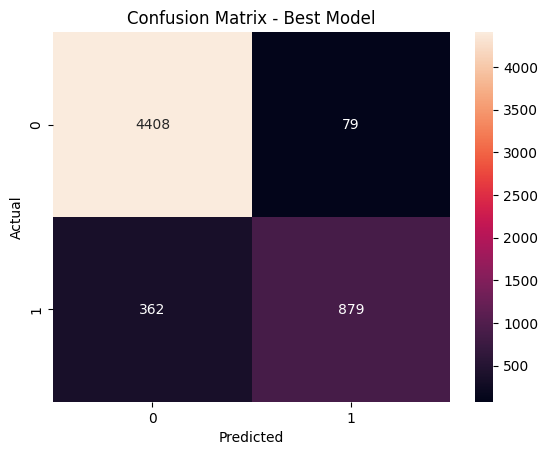

Text(0.5, 1.0, 'ROC Curve - Best Model')

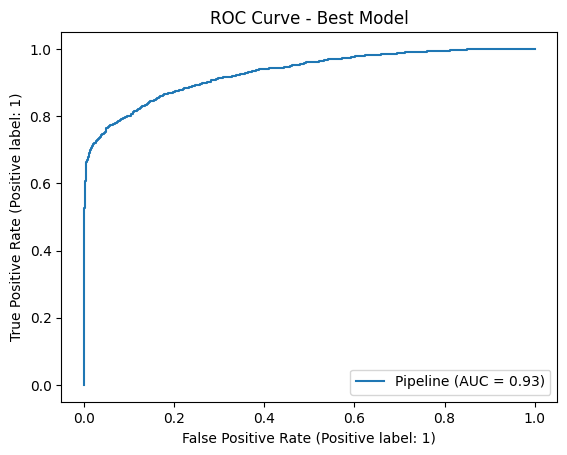

In [6]:
best_model = joblib.load("C:/Projects/Credit_scoring_system_project/models/best_model.pkl")

# Confusion Matrix
cm = confusion_matrix(y_test, best_model.predict(X_test))
sns.heatmap(cm, annot=True,fmt="g")
plt.title(f"Confusion Matrix - Best Model")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC Curve
RocCurveDisplay.from_estimator(best_model, X_test, y_test)
plt.title(f"ROC Curve - Best Model")
plt.show()